In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [4]:
matplotlib.style.use('ggplot')
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['lines.markersize'] = 10

In [5]:
stats_path = 'hip_stats.csv'
df = pd.read_csv(stats_path)

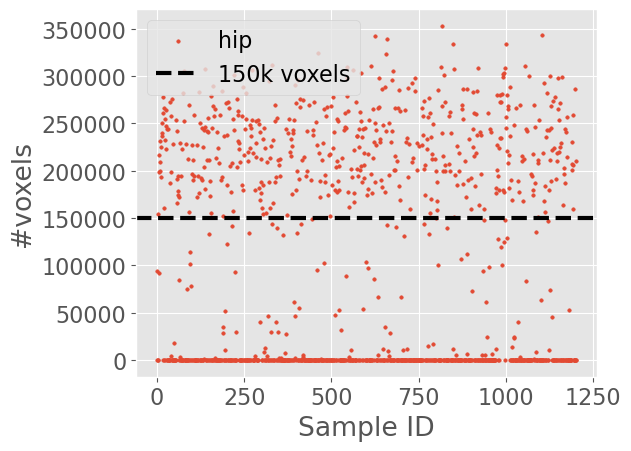

In [6]:

# ax = df['total_voxels'].plot(style=".",alpha=0.5,label='Hip',s=6)
plt.scatter(x = range(len(df['total_voxels'])),y=df['total_voxels'],label='hip',s=6)
plt.axhline(y=150000,linestyle='--',label='150k voxels',color='k')
plt.ylabel('#voxels')
plt.xlabel('Sample ID')
plt.legend()
plt.tight_layout()
plt.savefig('totalsegmentator_hip_voxel_plot.pdf')

In [7]:
df_non_empty = df[df['total_voxels'] != 0]
df_non_empty['total_voxels'].count()

632

In [8]:
voxel_threshold = 150000
df_non_empty[(df_non_empty['total_voxels'] > voxel_threshold)]['total_voxels'].count()

509

In [9]:
df_threshold = df_non_empty[(df_non_empty['total_voxels'] > voxel_threshold)]

In [10]:
threshold_list = 150000
threshold_list= df_non_empty[(df_non_empty['total_voxels'] > voxel_threshold)]['Unnamed: 0'].to_numpy()
print(threshold_list)

['s0001' 's0004' 's0006' 's0010' 's0011' 's0012' 's0013' 's0014' 's0015'
 's0016' 's0019' 's0022' 's0024' 's0028' 's0029' 's0030' 's0031' 's0327'
 's0328' 's0329' 's0332' 's0334' 's0339' 's0341' 's0342' 's0344' 's0345'
 's0350' 's0720' 's0721' 's0723' 's0724' 's0726' 's0727' 's0728' 's0731'
 's0733' 's0737' 's1041' 's1044' 's1045' 's1046' 's1050' 's1057' 's1061'
 's1062' 's1069' 's1070' 's0034' 's0092' 's0120' 's0157' 's0408' 's0440'
 's0564' 's0592' 's0621' 's0646' 's0038' 's0040' 's0042' 's0045' 's0049'
 's0050' 's0052' 's0053' 's0054' 's0058' 's0059' 's0062' 's0065' 's0066'
 's0494' 's0495' 's0499' 's0500' 's0502' 's0505' 's0506' 's0507' 's0509'
 's0513' 's0516' 's0519' 's1223' 's1224' 's1228' 's1230' 's1233' 's1234'
 's1238' 's1244' 's1247' 's0158' 's0161' 's0163' 's0166' 's0168' 's0171'
 's0178' 's0179' 's0182' 's0183' 's0072' 's0073' 's0074' 's0075' 's0076'
 's0077' 's0078' 's0082' 's0086' 's0089' 's0090' 's0091' 's0878' 's0880'
 's0884' 's0885' 's0894' 's0895' 's0899' 's0903' 's

In [23]:
unusable_list = pd.read_csv('totalsegmentor_hip_unusable.list',header=None).to_numpy().flatten()

In [24]:
len(threshold_list),len(unusable_list)

(509, 182)

In [25]:
print(unusable_list)

['s0000' 's0001' 's0009' 's0022' 's0328' 's0343' 's0353' 's0721' 's0727'
 's0730' 's0732' 's1053' 's1063' 's1065' 's1068' 's0092' 's0048' 's0066'
 's0492' 's0499' 's0509' 's0511' 's1235' 's1236' 's1240' 's1241' 's1246'
 's0158' 's0068' 's0069' 's0071' 's0072' 's0073' 's0895' 's0903' 's0105'
 's0106' 's0117' 's0191' 's0193' 's0201' 's0196' 's0201' 's0209' 's0210'
 's0213' 's0216' 's0220' 's0221' 's0227' 's0228' 's0229' 's0233' 's0235'
 's0239' 's0242' 's0246' 's0253' 's0256' 's0261' 's0264' 's0275' 's0283'
 's0286' 's0291' 's0298' 's0291' 's0298' 's0304' 's0306' 's0311' 's0313'
 's0315' 's0316' 's0360' 's0366' 's0371' 's0372' 's0376' 's0418' 's0425'
 's0431' 's0443' 's0462' 's0579' 's0583' 's0586' 's0590' 's0591' 's0525'
 's0545' 's0556' 's0560' 's0602' 's0633' 's0640' 's0647' 's0666' 's0677'
 's0679' 's0693' 's0694' 's0700' 's0709' 's0740' 's0741' 's0744' 's0777'
 's0783' 's0788' 's0790' 's0800' 's0812' 's0837' 's0846' 's0837' 's0921'
 's0934' 's0938' 's0943' 's0952' 's0962' 's0970' 's

In [26]:
usable_list = []
for p in threshold_list:
    if p in unusable_list:
        pass
    else:
        usable_list.append(p)

In [27]:
len(usable_list)

446

In [28]:
with open('totalsegmentor_hip_subjects.csv','w') as f:
    [f.write(f'{p}\n') for p in usable_list]
f.close()

In [29]:
subjects_list = pd.read_csv('totalsegmentor_hip_subjects.csv')

In [42]:
import SimpleITK as sitk
sizes = []
for subject in subjects_list.to_numpy().flatten():
    hip_path = f'../../../../../2D-3D-Reconstruction-Datasets/totalsegmentator/Totalsegmentator_dataset/{subject}/hip_no_sacrum.nii.gz'
    
    img = sitk.ReadImage(hip_path)
    seg_stats = sitk.LabelShapeStatisticsImageFilter()
    seg_stats.Execute(img)
    bbox = seg_stats.GetBoundingBox(1)
    sizes.append(list(bbox[3:]))
    print(sizes[-1])
    del img
    # sizes.append(list(reader.GetSize()))

[189, 106, 129]
[174, 98, 137]
[176, 96, 140]
[205, 113, 143]
[196, 100, 146]
[204, 89, 141]
[178, 106, 148]
[194, 112, 152]
[194, 99, 147]
[180, 105, 154]
[177, 92, 130]
[184, 99, 153]
[189, 106, 145]
[202, 97, 145]
[188, 104, 150]
[189, 102, 144]
[204, 100, 144]
[183, 100, 141]
[186, 99, 150]
[202, 114, 155]
[212, 117, 142]
[182, 100, 145]
[196, 106, 154]
[206, 109, 143]
[188, 108, 152]
[173, 100, 145]
[186, 104, 140]
[190, 94, 132]
[170, 102, 142]
[163, 97, 138]
[193, 98, 151]
[167, 99, 142]
[194, 107, 158]
[206, 110, 158]
[183, 110, 153]
[195, 110, 148]
[163, 102, 138]
[210, 101, 152]
[181, 93, 132]
[198, 103, 147]
[179, 105, 142]
[184, 99, 140]
[201, 103, 148]
[201, 104, 146]
[182, 108, 137]
[193, 97, 149]
[172, 98, 132]
[183, 105, 146]
[182, 99, 128]
[201, 109, 149]
[183, 99, 149]
[189, 98, 143]
[172, 93, 138]
[186, 101, 148]
[193, 96, 147]
[204, 114, 151]
[163, 102, 139]
[202, 90, 143]
[213, 105, 161]
[183, 104, 136]
[197, 99, 140]
[183, 112, 139]
[181, 101, 158]
[193, 103, 151]

In [43]:
import numpy as np
np.asarray(sizes).max(axis=0)

array([282, 128, 394])

In [38]:
import numpy as np
np.asarray(sizes).max(axis=0)

array([499, 430, 851])

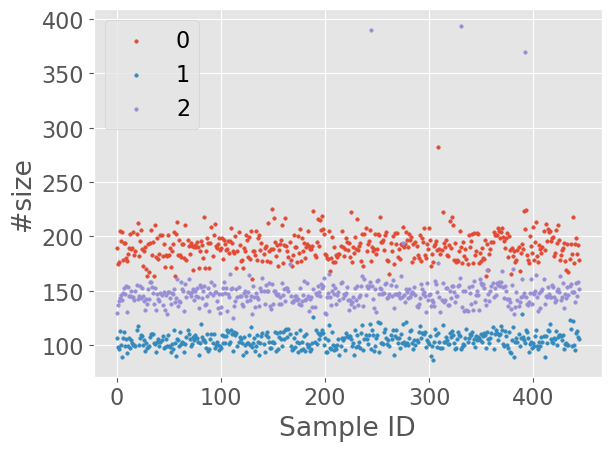

In [50]:
# ax = df['total_voxels'].plot(style=".",alpha=0.5,label='Hip',s=6)
for i in range(3):
    plt.scatter(x = range(len(sizes)),y=np.asarray(sizes)[:,i],label=i,s=6)


# plt.axhline(y=150000,linestyle='--',label='150k voxels',color='k')
plt.ylabel('#size')
plt.xlabel('Sample ID')
plt.legend()
plt.tight_layout()

In [51]:
import SimpleITK as sitk
sizes = []
for subject in subjects_list.to_numpy().flatten():
    hip_path = f'../../../../../2D-3D-Reconstruction-Datasets/totalsegmentator/Totalsegmentator_dataset/{subject}/hip_sacrum.nii.gz'
    
    img = sitk.ReadImage(hip_path)
    seg_stats = sitk.LabelShapeStatisticsImageFilter()
    seg_stats.Execute(img)
    bbox = seg_stats.GetBoundingBox(1)
    sizes.append(list(bbox[3:]))
    print(sizes[-1])
    del img
    # sizes.append(list(reader.GetSize()))

[189, 116, 129]
[174, 101, 137]
[176, 108, 140]
[205, 116, 143]
[196, 115, 146]
[204, 105, 141]
[178, 109, 148]
[194, 119, 152]
[194, 107, 147]
[180, 115, 154]
[177, 110, 130]
[184, 107, 153]
[189, 125, 145]
[202, 107, 145]
[188, 113, 150]
[189, 106, 144]
[204, 101, 144]
[183, 114, 141]
[186, 112, 150]
[202, 114, 155]
[212, 123, 142]
[182, 108, 145]
[196, 113, 154]
[206, 118, 143]
[188, 113, 152]
[173, 110, 145]
[186, 117, 140]
[190, 113, 132]
[170, 112, 142]
[163, 109, 138]
[193, 104, 151]
[167, 112, 142]
[194, 113, 158]
[206, 120, 158]
[183, 114, 153]
[195, 114, 148]
[163, 109, 138]
[210, 107, 152]
[181, 105, 132]
[198, 115, 147]
[179, 105, 142]
[184, 113, 140]
[201, 115, 148]
[201, 112, 146]
[182, 116, 137]
[193, 107, 149]
[172, 107, 132]
[183, 114, 146]
[182, 112, 128]
[201, 119, 149]
[183, 115, 149]
[189, 110, 143]
[172, 105, 138]
[186, 114, 148]
[193, 101, 147]
[204, 117, 151]
[163, 109, 139]
[202, 103, 143]
[213, 128, 161]
[183, 112, 136]
[197, 113, 140]
[183, 121, 139]
[181, 10

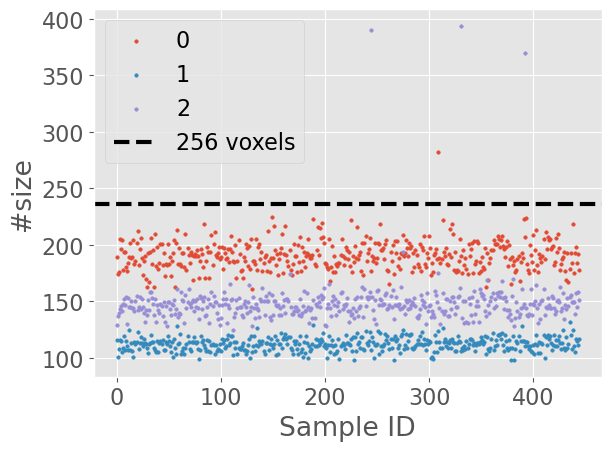

In [56]:
# ax = df['total_voxels'].plot(style=".",alpha=0.5,label='Hip',s=6)
for i in range(3):
    plt.scatter(x = range(len(sizes)),y=np.asarray(sizes)[:,i],label=i,s=6)


plt.axhline(y=236,linestyle='--',label='256 voxels',color='k')
plt.ylabel('#size')
plt.xlabel('Sample ID')
plt.legend()
plt.tight_layout()